# Mid Term Assignment Report

In [25]:
import warnings
warnings.filterwarnings('ignore')

#for data preprocessing 
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm

#for differnt classifier for testing 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BaseNB


#for validation 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

#for visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import itertools
scaler = StandardScaler()

In [26]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Data Description: 
    
The dataset is split into training and test sets; both files are in CSV format. The training dataset consists of 14,528 records and the test dataset consists of 116,205 records. We provide you the class labels in the training set, and the test labels are held out. There are 55 attributes in each of the training and test sets. **Attributes 1-54 are numeric cartographic variables – some of them are binary variables indicating absence or presence of something, such as a particular soil type. Specifically, attributes #1, 8, 9, 20, 22, 31, 42, 47, 50, 54 are numeric, and the rest are all binary (except the one for class labels).** 
The last column contains the class labels. <br>
**train.csv**: Training set with 14,528 records (each row is a record). Each record contains 55 attributes. The last attribute is the class label (1~7). <br>
**test.csv**: Testing set with 116,205 records (each row is a record). Each record contains 54 attributes since the class labels are withheld. <br>
**format.dat**: A sample submission with 116,205 entries of randomly chosen numbers between 1 and 7. 

In [27]:
df = pd.read_csv(r'C:\Users\nirav.gandhi\Desktop\data science\kaggle\chirag friend iit\data\1551366200_25631_train.csv')

In [29]:
df.columns

Index(['39', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '208', '5603', '0.6', '1',
       '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '7',
       '0.15', '246', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22',
       '0.23', '236', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30',
       '0.31', '0.32', '0.33', '1952', '0.34', '0.35', '1.1', '0.36', '176',
       '0.37', '0.38', '663', '0.39', '0.40', '0.41', '2945', '2'],
      dtype='object')

In [20]:
df.columns

Index(['39', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '208', '5603', '0.6', '1',
       '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '7',
       '0.15', '246', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22',
       '0.23', '236', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30',
       '0.31', '0.32', '0.33', '1952', '0.34', '0.35', '1.1', '0.36', '176',
       '0.37', '0.38', '663', '0.39', '0.40', '0.41', '2945', '2'],
      dtype='object')

In [9]:
bin_class = []
for i in range(1,42):
    key = "0." + str(i)
    bin_class.append(key)
    print("bins value after each iterations ",bin_class)
#three values are not getting converted--need to hard code those values    
bin_class += ['0','1','1.1']
print(bin_class)

bins value after each iterations  ['0.1']
bins value after each iterations  ['0.1', '0.2']
bins value after each iterations  ['0.1', '0.2', '0.3']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11']
bins value after each iterations  ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12']
bins value after each iterat

In [35]:
#output column check 
df['2'].value_counts()
#df['2']

2    7082
1    5296
3     894
7     513
6     435
5     238
4      69
Name: 2, dtype: int64

In [38]:
Y = df['2']
num_class = df.drop(bin_class + ['2'],axis=1).columns

### binary classes

In [39]:
bin_data = df[bin_class]
bin_data.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0,1,1.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Numeric class

In [40]:
num_data = df[num_class]
df[num_class].head()


,39,208,5603,7,246,236,1952,176,663,2945
0,7,227,511,10,245,171,1418,150,120,2441
1,18,232,2310,12,217,67,1961,116,234,3000
2,17,235,3849,10,223,86,5566,119,256,2932
3,36,143,1899,25,225,294,3427,218,216,3103
4,10,219,4536,7,225,34,5778,142,270,2955


### converting numeric data to binary 

In [41]:
med_list = df[num_class].median()

In [42]:
med_list

39        29.0
208      218.0
5603    1967.0
7         13.0
246      226.0
236      125.0
1952    1718.0
176      143.0
663      216.0
2945    2997.0
dtype: float64

In [43]:
for col in num_class:
    num_data[col] = np.where(num_data[col]>med_list[col],1,0)

In [44]:
num_data.head()

,39,208,5603,7,246,236,1952,176,663,2945
0,0,1,0,0,1,1,0,1,0,0
1,0,1,1,0,0,0,1,0,1,1
2,0,1,1,0,0,0,1,0,1,0
3,1,0,0,1,0,1,1,1,0,1
4,0,1,1,0,0,0,1,0,1,0


### creating final dataset where all the features are converted into categorical features


In [45]:
data = pd.concat([bin_data,num_data],axis=1)

# Principal Components for feature reduction 

**Principal component analysis (PCA)** is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are n observations with p variables, then the number of distinct principal components is **min ( n − 1 , p )**. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables. 

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)

principalComponents = pca.fit_transform(data)

In [73]:
pca.explained_variance_ratio_
principalComponents.shape

(14527, 25)

In [71]:
principalComponents = np.where(principalComponents>0,1,0)

# Training and testing data

In [74]:
x_train,x_test,y_train,y_test = train_test_split(principalComponents,Y,test_size=0.2,random_state=False)
res = []

## Decision Tree Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.<br><br>

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning. 
<br><br>
Basic Model:
![img](decision-tree.png)

             precision    recall  f1-score   support

          1       0.66      0.71      0.69      1062
          2       0.73      0.72      0.72      1424
          3       0.56      0.75      0.64       157
          4       0.25      0.08      0.12        12
          5       0.24      0.11      0.15        44
          6       0.35      0.14      0.20        86
          7       0.74      0.47      0.58       121

avg / total       0.67      0.68      0.67      2906



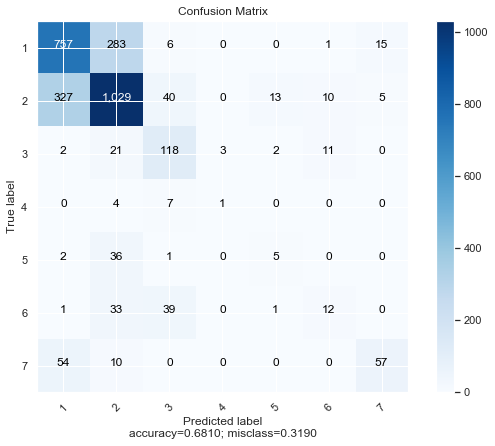

In [75]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
score = clf_dt.score(x_test,y_test)
y_pred = clf_dt.predict(x_test)
print(classification_report(y_test, y_pred))
x = classification_report(y_test, y_pred)
res.append(['dec-tree',x.split()[-2]])
# # confusion_matrix
plot_confusion_matrix(cm = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['1', '2', '3','4','5','6','7'],
                      title= "Confusion Matrix")

## Naive-bayes Classifer
Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features. <br><br>
Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers. 
![img](naive_bayes_icon.png)

             precision    recall  f1-score   support

          1       0.59      0.54      0.56      1062
          2       0.61      0.80      0.70      1424
          3       0.65      0.14      0.23       157
          4       0.00      0.00      0.00        12
          5       0.00      0.00      0.00        44
          6       0.36      0.14      0.20        86
          7       1.00      0.08      0.15       121

avg / total       0.60      0.61      0.57      2906



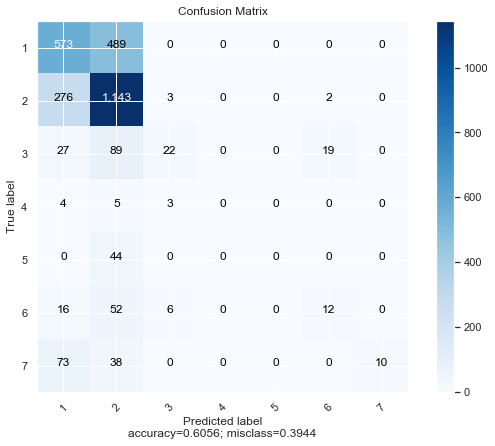

In [76]:
clf_nb = MultinomialNB()
clf_nb.fit(x_train,y_train)
score = clf_nb.score(x_test,y_test)
y_pred = clf_nb.predict(x_test)
print(classification_report(y_test, y_pred))
x = classification_report(y_test, y_pred)
res.append(['Naive-bayes',x.split()[-2]])
# # confusion_matrix
plot_confusion_matrix(cm = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['1', '2', '3','4','5','6','7'],
                      title= "Confusion Matrix")

## K Neighbors Classifier

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.<br><br>

Both for classification and regression, a useful technique can be used to assign weight to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.
![](knn.gif)

             precision    recall  f1-score   support

          1       0.64      0.68      0.66      1062
          2       0.70      0.72      0.71      1424
          3       0.53      0.71      0.60       157
          4       0.00      0.00      0.00        12
          5       0.38      0.11      0.18        44
          6       0.42      0.16      0.24        86
          7       0.76      0.44      0.55       121

avg / total       0.66      0.66      0.65      2906



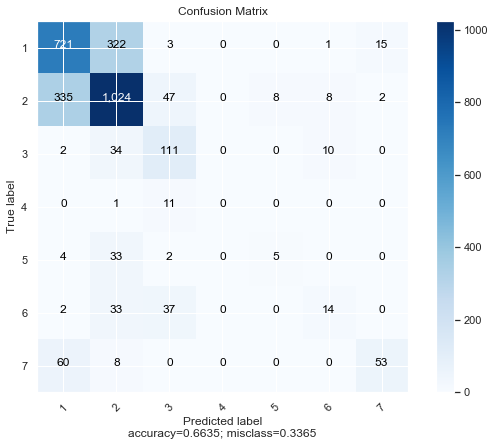

In [77]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
score = clf_knn.score(x_test,y_test)
y_pred = clf_knn.predict(x_test)
print(classification_report(y_test, y_pred))
x = classification_report(y_test, y_pred)
res.append(['KNN',x.split()[-2]])
# # confusion_matrix
plot_confusion_matrix(cm = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['1', '2', '3','4','5','6','7'],
                      title= "Confusion Matrix")

## Neural Network - MLP
A **multilayer perceptron (MLP)** is a class of feedforward artificial neural network. A MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.
<br>
Multilayer perceptrons are sometimes colloquially referred to as "vanilla" neural networks, especially when they have a single hidden layer.
![img](mlp-network.png)

             precision    recall  f1-score   support

          1       0.66      0.71      0.68      1062
          2       0.74      0.72      0.73      1424
          3       0.55      0.82      0.66       157
          4       0.00      0.00      0.00        12
          5       0.43      0.07      0.12        44
          6       0.30      0.10      0.16        86
          7       0.72      0.50      0.59       121

avg / total       0.68      0.68      0.67      2906



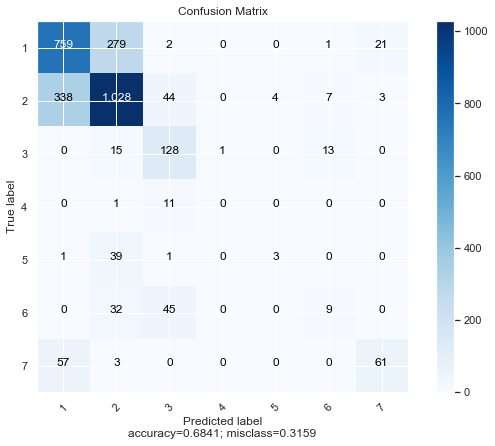

In [96]:
clf_mpl = MLPClassifier()
clf_mpl.fit(x_train,y_train)
score = clf_mpl.score(x_test,y_test)

y_pred = clf_mpl.predict(x_test)
print(classification_report(y_test, y_pred))
x = classification_report(y_test, y_pred)
res.append(['Neural_network',x.split()[-2]])

# confusion_matrix
plot_confusion_matrix(cm = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names =  ['1', '2', '3','4','5','6','7'],
                      title= "Confusion Matrix")

In [79]:
res = [[x,float(str(y))] for x,y in res]

In [80]:
f1_score = pd.DataFrame(res,columns=['Classifier','f1-score'])
f1_score

,Classifier,f1-score
0,dec-tree,0.67
1,Naive-bayes,0.57
2,KNN,0.65
3,Neural_network,0.66


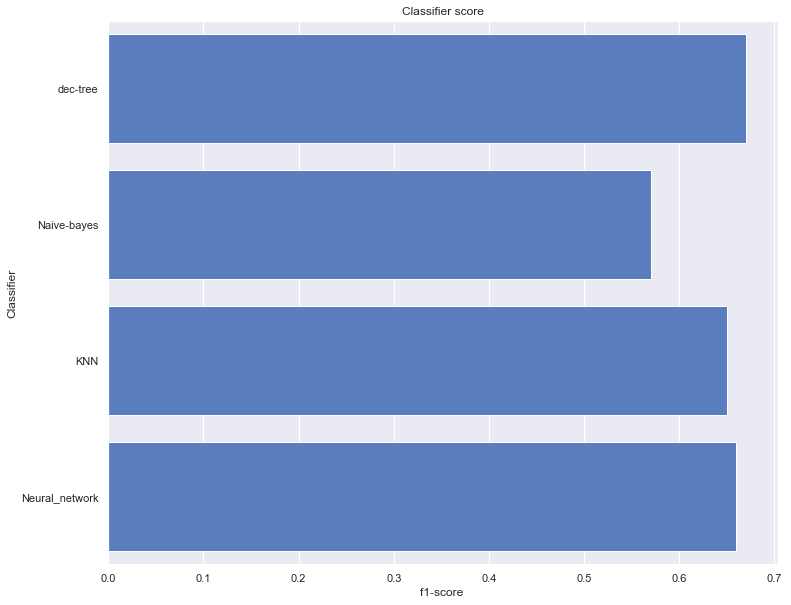

In [81]:
plt.figure(figsize=(12,10))
sns.set_color_codes("muted")
sns.barplot(x='f1-score', y='Classifier', data=f1_score, color="b")

plt.xlabel('f1-score ')
plt.title('Classifier score')
plt.show()

## prediction

In [99]:
df = pd.read_csv(r'C:\Users\nirav.gandhi\Desktop\data science\kaggle\chirag friend iit\data\1551366200_2625306_test_no_label.csv')
bin_class = []
for i in range(1,42):
    key = "0." + str(i)
    bin_class.append(key)
bin_class += ['0','1','1.1']

num_class = df.drop(bin_class ,axis=1).columns
num_data = df[num_class]

bin_data = df[bin_class]

med_list = df[num_class].median()

print(num_class)
for col in num_class:
    num_data[col] = np.where(num_data[col]>med_list[col],1,0)
    
principalComponents = pca.fit_transform(df)

principalComponents = np.where(principalComponents>0,1,0)

principalComponents.shape

Index(['27', '253', '4044', '30', '185', '103', '1072', '36', '42', '3295'], dtype='object')


(116204, 25)

In [101]:
y_pred = clf_mpl.predict(principalComponents)

In [91]:
f = open('output.dat','w')
for value in y_pred:
    f.write(str(value) + ' \n')
f.close()

In [112]:
y_pred.shape
cat, size = np.unique(y_pred, return_counts=True)
print("distinct output categories ",cat)
print("output categories counts in each bucket ",size)


distinct output categories  [1 2 3 4 5 6 7]
output categories counts in each bucket  [26862 86436   514   125   142   301  1824]
